## Library Imports

In [5]:
import pandas as pd
from scipy.stats import spearmanr, kendalltau, linregress, rankdata
import matplotlib.pyplot as plt
import sys
sys.path.append("..")  
import metaprivBIDS_stat as ST
from metaprivBIDS_stat import plot_calc
from metaprivBIDS_stat import rst_outlier_case2

## File from OpenNeuro Import
AL_IMAGE is the raw dataset "EEG: Alcohol imagery reinforcement learning task with light and heavy drinker participants" taken from OpenNeuro. 


In [6]:
AL_IMAGE = 'https://s3.amazonaws.com/openneuro.org/ds004515/participants.tsv?versionId=OX_rM1XL_frHnMPy12BwJttx3nN3k8kn'
AL_IMAGE = pd.read_csv(AL_IMAGE, sep='\t')
AL_IMAGE.to_csv('data_ds004515/AL_IMAGE_dataset_ds004515.csv', sep=',', index=False)

In [7]:
AL_IMAGE.head()

,participant_id,Original_ID,sex,age,GROUP,BDI,AUDIT,EDUCATION
0,sub-001,10600,F,43,CTL,14,1,16
1,sub-002,10601,F,50,CTL,2,2,16
2,sub-003,10602,F,22,CTL,2,1,18
3,sub-004,10603,F,18,CTL,0,1,13
4,sub-005,10604,M,31,CTL,1,1,14


## Load in of results calculated using (MetaprivBIDS App)

The selected quasi identifers are: 
- age
- sex
- GROUP
- BDI
- AUDIT
- EDUCATION

The selected sensitive variables are:
- BDI, AUDIT & GROUP

The dis-score fraction is the default 0.3 & missing values are indicated as NaN.

In [8]:
suda = pd.read_csv('data_ds004515/SUDA_ds004515.csv', sep=',')
pif = pd.read_csv('data_ds004515/PIF_ds004515.csv', sep=',',index_col='Unnamed: 0').sort_index()

## Using MetaprivBIDS stats import to calculate Pearson and Spearman correlation on row level.

In [12]:
correlation_spearman, p_value = spearmanr(suda['dis-score'], pif['RIG'])
print(f"Spearman Rank Correlation between suda & pif: {correlation_spearman:.3f},p-Value {p_value:.10f}")  
    
tau, p_value = kendalltau(suda['dis-score'], pif['RIG'])
print(f"Kendall's Tau between suda & pif: {tau:.2f}, p-value: {p_value:.4f}")

Spearman Rank Correlation between suda & pif: 0.679,p-Value 0.0000000163
Kendall's Tau between suda & pif: 0.56, p-value: 0.0000


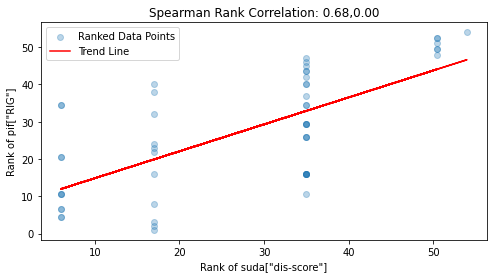

In [12]:
suda_ranked = rankdata(suda['dis-score'])
pif_ranked = rankdata(pif['RIG'])
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(suda_ranked, pif_ranked, alpha=0.3, label='Ranked Data Points')
slope, intercept, _, _, _ = linregress(suda_ranked, pif_ranked)
ax.plot(suda_ranked, slope * suda_ranked + intercept, color='red', label='Trend Line')
ax.set_title(f'Spearman Rank Correlation: {correlation_spearman:.2f},{p_value:.2f}')
ax.set_xlabel('Rank of suda["dis-score"]')
ax.set_ylabel('Rank of pif["RIG"]')
ax.grid(False)
ax.legend()
plt.show()

In [6]:
AL_IMAGE['GROUP'].value_counts()

ALC    28
CTL    26
Name: GROUP, dtype: int64

# Outlier detection for SUDA & PIF

In [11]:
class_outliers, madn, mad, outlier_indices, above_outlier_indices = ST.rst_outlier_case2(suda, 'dis-score')

In [12]:
print(len(above_outlier_indices))

0


In [13]:
class_outliers, madn, mad, outlier_indices, above_outlier_indices = ST.rst_outlier_case2(pif, 'RIG')

In [14]:
print(len(above_outlier_indices))

4


In [15]:
outlier_indices

[16, 30, 35, 41]

## Selected outlier participant 

In [31]:
AL_IMAGE.loc[30]

participant_id    sub-031
Original_ID         10632
sex                     F
age                    25
GROUP                 ALC
BDI                    14
AUDIT                   5
EDUCATION              15
Name: 30, dtype: object